In [ ]:
Common Financial Analysis / calculate daily and quarterly return 

In [1]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
#Importing Financial Data Into Python

yahooData = pdr.get_data_yahoo('aapl', 
                          start=datetime.datetime(2010, 1, 1), 
                          end=datetime.datetime(2018, 1, 1))

In [3]:
# Calculate Daily returns from closing price

daily_pct_change = yahooData['Adj Close'].pct_change()[1:]

print(daily_pct_change)

Date
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
2010-01-11   -0.008821
2010-01-12   -0.011375
2010-01-13    0.014105
2010-01-14   -0.005791
2010-01-15   -0.016712
2010-01-19    0.044238
2010-01-20   -0.015392
2010-01-21   -0.017286
2010-01-22   -0.049599
2010-01-25    0.026903
2010-01-26    0.014133
2010-01-27    0.009420
2010-01-28   -0.041322
2010-01-29   -0.036278
2010-02-01    0.013902
2010-02-02    0.005803
2010-02-03    0.017206
2010-02-04   -0.036039
2010-02-05    0.017756
2010-02-08   -0.006856
2010-02-09    0.010663
2010-02-10   -0.005453
2010-02-11    0.018193
2010-02-12    0.008608
2010-02-16    0.015071
2010-02-17   -0.004179
                ...   
2017-11-17   -0.005552
2017-11-20   -0.000999
2017-11-21    0.018590
2017-11-22    0.010512
2017-11-24    0.000057
2017-11-27   -0.005030
2017-11-28   -0.005859
2017-11-29   -0.020743
2017-11-30    0.013984
2017-12-01   -0.004655
2017-12-04   -0.007308
2017-12-05   -0.000942
2017-1

In [4]:
# Print daily log returns
print(np.log(yahooData['Adj Close'].pct_change()[1:]+1))

Date
2010-01-05    0.001728
2010-01-06   -0.016034
2010-01-07   -0.001850
2010-01-08    0.006626
2010-01-11   -0.008861
2010-01-12   -0.011440
2010-01-13    0.014007
2010-01-14   -0.005808
2010-01-15   -0.016854
2010-01-19    0.043288
2010-01-20   -0.015512
2010-01-21   -0.017438
2010-01-22   -0.050871
2010-01-25    0.026547
2010-01-26    0.014034
2010-01-27    0.009376
2010-01-28   -0.042200
2010-01-29   -0.036953
2010-02-01    0.013806
2010-02-02    0.005786
2010-02-03    0.017060
2010-02-04   -0.036704
2010-02-05    0.017600
2010-02-08   -0.006879
2010-02-09    0.010607
2010-02-10   -0.005468
2010-02-11    0.018030
2010-02-12    0.008571
2010-02-16    0.014959
2010-02-17   -0.004188
                ...   
2017-11-17   -0.005568
2017-11-20   -0.000999
2017-11-21    0.018420
2017-11-22    0.010457
2017-11-24    0.000057
2017-11-27   -0.005042
2017-11-28   -0.005876
2017-11-29   -0.020961
2017-11-30    0.013887
2017-12-01   -0.004666
2017-12-04   -0.007335
2017-12-05   -0.000943
2017-1

In [16]:
# Resample `yahooData` to business months, take last observation as value (the value of the last day of each month)
monthly = yahooData.resample('BM').apply(lambda x: x[-1])
print(monthly)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2010-01-29   28.885714   27.178572   28.725714   27.437143  311488100.0   
2010-02-26   29.309999   28.857143   28.911428   29.231428  126865200.0   
2010-03-31   33.801430   33.494286   33.641430   33.571430  107664900.0   
2010-04-30   38.652859   37.285713   38.472858   37.298573  135615900.0   
2010-05-31   37.057144   36.192856   37.055714   36.697144  203903700.0   
2010-06-30   36.852856   35.715714   36.672855   35.932858  184863000.0   
2010-07-30   37.099998   36.414288   36.555714   36.750000  112052500.0   
2010-08-31   34.937141   34.335712   34.549999   34.728573  105196700.0   
2010-09-30   41.428570   40.178570   41.285713   40.535713  168347900.0   
2010-10-29   43.697144   42.981430   43.461430   42.997143  107627800.0   
2010-11-30   44.908573   44.410000   44.791428   44.450001  125464500.0   
2010-12-31   46.211430   

In [ ]:
# Calculate the monthly percentage change
monthly.pct_change()

In [30]:
# Resample `YahooData` to quarters, take the mean as value per quarter
quarter = yahooData.resample("4M").mean()
quarter.pct_change()[1:]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-05-31,0.106815,0.110724,0.104581,0.114763,-0.194441,0.114763
2010-09-30,0.125508,0.128067,0.126178,0.123813,-0.028014,0.123813
2011-01-31,0.216407,0.224709,0.219355,0.221632,-0.246665,0.221632
2011-05-31,0.086790,0.086786,0.087439,0.085850,-0.059310,0.085850
2011-09-30,0.069299,0.061647,0.064811,0.065699,0.260926,0.065699
2012-01-31,0.086193,0.092054,0.089737,0.088862,-0.239217,0.088862
2012-05-31,0.406081,0.398529,0.402731,0.402800,0.503180,0.402800
2012-09-30,0.106183,0.113868,0.109022,0.110607,-0.361874,0.112794
2013-01-31,-0.100360,-0.108734,-0.101703,-0.106579,0.487564,-0.101801


In [31]:
# Daily returns
daily_close = yahooData['Adj Close']
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_change`
print(daily_pct_change)

Date
2010-01-04         NaN
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
2010-01-11   -0.008821
2010-01-12   -0.011375
2010-01-13    0.014105
2010-01-14   -0.005791
2010-01-15   -0.016712
2010-01-19    0.044238
2010-01-20   -0.015392
2010-01-21   -0.017286
2010-01-22   -0.049599
2010-01-25    0.026903
2010-01-26    0.014133
2010-01-27    0.009420
2010-01-28   -0.041322
2010-01-29   -0.036278
2010-02-01    0.013902
2010-02-02    0.005803
2010-02-03    0.017206
2010-02-04   -0.036039
2010-02-05    0.017756
2010-02-08   -0.006856
2010-02-09    0.010663
2010-02-10   -0.005453
2010-02-11    0.018193
2010-02-12    0.008608
2010-02-16    0.015071
                ...   
2017-11-17   -0.005552
2017-11-20   -0.000999
2017-11-21    0.018590
2017-11-22    0.010512
2017-11-24    0.000057
2017-11-27   -0.005030
2017-11-28   -0.005859
2017-11-29   -0.020743
2017-11-30    0.013984
2017-12-01   -0.004655
2017-12-04   -0.007308
2017-12-05   -0.000942
2017-1

In [36]:
# calculate daily log return using shift
daily_log_returns_shift = np.log(daily_close / daily_close.shift(1))

In [37]:
print(daily_log_returns_shift)

Date
2010-01-04         NaN
2010-01-05    0.001728
2010-01-06   -0.016034
2010-01-07   -0.001850
2010-01-08    0.006626
2010-01-11   -0.008861
2010-01-12   -0.011440
2010-01-13    0.014007
2010-01-14   -0.005808
2010-01-15   -0.016854
2010-01-19    0.043288
2010-01-20   -0.015512
2010-01-21   -0.017438
2010-01-22   -0.050871
2010-01-25    0.026547
2010-01-26    0.014034
2010-01-27    0.009376
2010-01-28   -0.042200
2010-01-29   -0.036953
2010-02-01    0.013806
2010-02-02    0.005786
2010-02-03    0.017060
2010-02-04   -0.036704
2010-02-05    0.017600
2010-02-08   -0.006879
2010-02-09    0.010607
2010-02-10   -0.005468
2010-02-11    0.018030
2010-02-12    0.008571
2010-02-16    0.014959
                ...   
2017-11-17   -0.005568
2017-11-20   -0.000999
2017-11-21    0.018420
2017-11-22    0.010457
2017-11-24    0.000057
2017-11-27   -0.005042
2017-11-28   -0.005876
2017-11-29   -0.020961
2017-11-30    0.013887
2017-12-01   -0.004666
2017-12-04   -0.007335
2017-12-05   -0.000943
2017-1

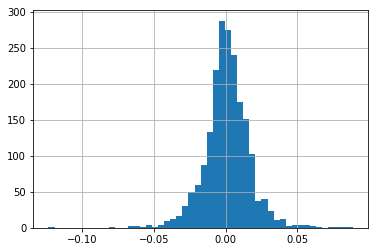

count    2013.000000
mean        0.001041
std         0.015932
min        -0.123558
25%        -0.006818
50%         0.000866
75%         0.009688
max         0.088741
Name: Adj Close, dtype: float64


In [42]:
# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

In [49]:
tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
alldata = pdr.get_data_yahoo(tickers,
                               start = '2013-01-01',
                               end = '2018-03-01')

In [50]:
print(alldata)

Attributes   Adj Close                                           Close  \
Symbols           AAPL         GOOG         IBM       MSFT        AAPL   
Date                                                                     
2013-01-02   69.057251   360.274597  153.321335  23.506062   78.432854   
2013-01-03   68.185600   360.483826  152.477966  23.191170   77.442856   
2013-01-04   66.286301   367.607117  151.478485  22.757137   75.285713   
2013-01-07   65.896370   366.003143  150.814758  22.714586   74.842857   
2013-01-08   66.073723   365.280823  150.603958  22.595436   75.044289   
2013-01-09   65.041084   367.681824  150.174469  22.723091   73.871429   
2013-01-10   65.847328   369.355560  150.611786  22.518839   74.787140   
2013-01-11   65.443581   368.613342  151.837692  22.833727   74.328575   
2013-01-14   63.110344   360.274597  150.408737  22.884794   71.678574   
2013-01-15   61.119232   361.111481  150.315033  23.157133   69.417145   
2013-01-16   63.656235   356.259644  1

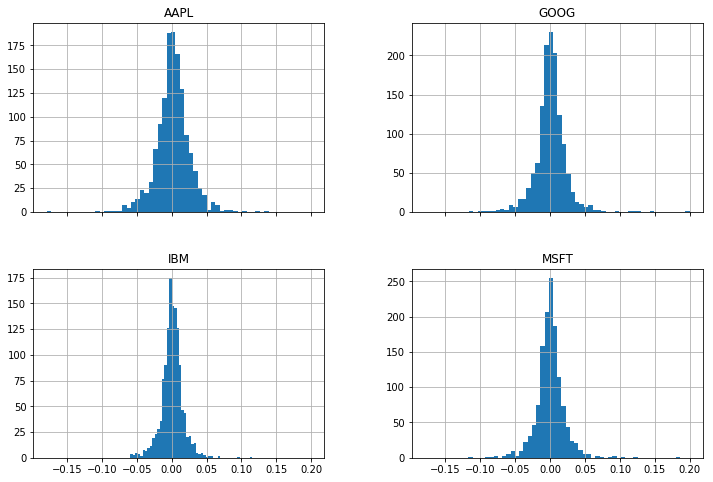

In [62]:
# Isolate the `Adj Close` values and transform the DataFrame
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()
